In [19]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import os
from PIL import Image
import numpy as np

def load_and_resize_doodles(input_folders, size=(28, 28)):
    X = []

    for input_folder in input_folders:
        for filename in os.listdir(input_folder):
            if filename.endswith(('.png', '.jpg', '.jpeg')):
                with Image.open(os.path.join(input_folder, filename)) as img:
                    # Convert to grayscale
                    img = img.convert('L')

                    # Resize the image
                    img_resized = img.resize(size, Image.LANCZOS)

                    # Convert image to numpy array
                    img_array = np.array(img_resized)

                    # Invert the image (assuming doodles are dark on light background)
                    img_array = 255 - img_array

                    # Enhance contrast
                    img_array = np.clip(img_array * 1.5, 0, 255).astype(np.uint8)

                    # Normalize to [0, 1]
                    img_array = img_array / 255.0

                    # Append to X
                    X.append(img_array)

                    print(f"Processed: {os.path.join(input_folder, filename)}")

    # Convert list to numpy array
    X = np.array(X)

    return X

# Usage
input_folders = [
    '/content/drive/MyDrive/Circles & Ellipses',
    '/content/drive/MyDrive/Rectangles & Rounded Rectangles',
    '/content/drive/MyDrive/Straight Lines',
    '/content/drive/MyDrive/Star',
    '/content/drive/MyDrive/Regular Polygons'
]

X = load_and_resize_doodles(input_folders)

print(f"X shape: {X.shape}")
print(f"Shape of each image: {X[0].shape}")

Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock10.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock12.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock15.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock20.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock2.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock14.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock19.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock17.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock1.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock18.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock16.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock11.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock13.png
Processed: /content/drive/MyDrive/Circles & Ellipses/AlarmClock9.png
Processed: /content/dri

In [22]:
X[10].shape

(28, 28)

In [23]:
X[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00392157, 0.00392157,
        0.        , 0.        , 0.00392157, 0.        , 0.00392157,
        0.        , 0.    

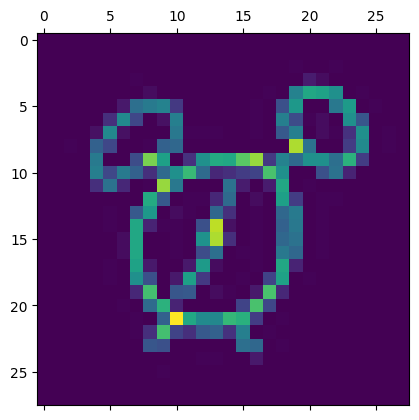

In [24]:
plt.matshow(X[12])

In [25]:
import numpy as np

y_train = np.concatenate([
    np.ones(441),
    np.full(205, 2),
    np.full(150, 3),
    np.full(116, 4),
    np.full(191, 5)
])

In [26]:
y_train.shape

(1103,)

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
indices = np.arange(len(y_train))
np.random.shuffle(indices)
X = X[indices]
y_train = y_train[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(882, 28, 28)

In [29]:
y_train.shape

(882,)

In [31]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00392157, 0.        , 0.00392157, 0.        ,
        0.        , 0.    

In [32]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [33]:
X_train_flattened.shape

(882, 784)

In [34]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00392157, 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:

from tensorflow import keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential([
    # Reshape the input from (784,) to (28, 28, 1)
    layers.Reshape((28, 28, 1), input_shape=(784,)),

    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Train the model
model.fit(X_train_flattened, y_train, epochs=50, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.1922 - loss: 2.5630 - val_accuracy: 0.3785 - val_loss: 2.1990
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.3909 - loss: 1.8711 - val_accuracy: 0.3785 - val_loss: 2.1098
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.5160 - loss: 1.5273 - val_accuracy: 0.3785 - val_loss: 2.0257
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.5860 - loss: 1.2441 - val_accuracy: 0.3785 - val_loss: 1.9371
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - accuracy: 0.6600 - loss: 1.1100 - val_accuracy: 0.3785 - val_loss: 1.8733
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6802 - loss: 0.9151 - val_accuracy: 0.3785 - val_loss: 1.7725
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7596 - loss: 0.8076 - val_accuracy: 0.3785 - val_loss: 1.6903
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7331 - loss: 0.8038 - val_accuracy: 0.3785 

In [36]:
model.evaluate(X_test_flattened,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8324 - loss: 0.8704


[0.8270367980003357, 0.8461538553237915]